In [1]:
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
import geopandas as gpd
import numpy as np

In [7]:
data_set = pd.read_csv('../data/economicas_clima.csv')
data_set = data_set.set_index('Unnamed: 0', drop=True)
data_set = data_set.drop(columns = "('Unnamed: 1_level_0', 'DPTO_CCDGO')")
data_set.head()

,"('Medida de pobreza multidimensional de fuente censal en el total del municipio', 'MPM')","('Medida de pobreza multidimensional de fuente censal en las cabeceras municipales', 'MPM_CAB')","('Medida de pobreza multidimensional de fuente censal en los centros poblados y el rural disperso', 'MPM_CPRD')","('Indicador de analfabetismo en el total del municipio', 'AFBMO_TOT')","('Indicador de analfabetismo en las cabeceras municipales', 'AFBMO_CAB')","('Indicador de analfabetismo en los centros poblados y el rural disperso', 'AFBMO_CPRD')","('Indicador de bajo logro educativo en el total del municipio', 'BLE_TOT')","('Indicador de bajo logro educativo en las cabeceras municipales', 'BLE_CAB')","('Indicador de bajo logro educativo en los centros poblados y el rural disperso', 'BLE_CPRD')","('Indicador de barreras a servicios para cuidado de la primera infancia en el total del municipio', 'BSCPI_TOT')",...,humedad_relativa,% DE PERSONAS EN EL DEPARTAMENTO,% DE HOMBRES EN EL DEPARTAMENTO,% DE MUJERES EN EL DEPARTAMENTO,% DE PERSONAS EN EL DEPARTAMENTO15_64,% DE HOMBRES EN EL DEPARTAMENTO15_64,% DE MUJERES EN EL DEPARTAMENTO15_64,% DE PERSONAS EN EL DEPARTAMENTO64_,% DE HOMBRES EN EL DEPARTAMENTO64_,% DE MUJERES EN EL DEPARTAMENTO64_
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Amazonas,84.6,0.0,84.6,17.7,0.0,19.8,78.1,0.0,78.1,17.4,...,86.878081,35.34,18.15,17.19,60.38,31.80,28.58,4.28,2.16,2.12
Antioquia,36.9,25.1,51.1,17.0,12.0,21.8,70.9,56.4,83.3,1.6,...,83.389164,19.72,10.09,9.62,70.53,34.01,36.52,9.76,4.19,5.56
Arauca,45.0,38.7,57.8,14.7,10.7,20.4,65.7,56.1,79.3,2.7,...,82.222732,28.25,14.45,13.80,65.90,33.07,32.83,5.85,3.03,2.82
Atlántico,36.0,32.7,54.4,17.8,14.7,31.0,52.4,46.8,73.1,2.6,...,80.665914,23.77,12.13,11.63,67.80,32.92,34.88,8.43,3.63,4.80
Bogotá,9.0,8.9,31.5,2.8,2.8,10.0,26.2,26.1,62.5,1.8,...,83.494365,18.57,9.48,9.10,72.56,34.70,37.86,8.86,3.63,5.23


In [9]:
tabla = pd.read_csv('23-Aug-2020sird_constantes_dia.csv')
data = tabla[['fecha', 'departamento', 'susceptibles', 'infectados', 'recuperados',
       'decesos', 'cantidad_mayores_65', 'ipm', 'poblacion_total',
       'personas_km2', 'edad_promedio', 'promedio_morbilidades']]
data_embeddings = data[data.fecha == '2020-08-21']
data_embeddings.set_index(data_embeddings['departamento'], drop=True,inplace=True)
data_embeddings = data_embeddings.drop(columns=['departamento', 'fecha'])
data_embeddings = data_embeddings.sort_index()
data_embeddings.head()

,susceptibles,infectados,recuperados,decesos,cantidad_mayores_65,ipm,poblacion_total,personas_km2,edad_promedio,promedio_morbilidades
departamento,,,,,,,,,,
amazonas,73529.0,1.0,1.0,0.0,2791,81.690909,78830.0,0.719,25.420,2435.250000
antioquia,6572804.0,1279.0,38.0,9.0,576614,37.586400,6690977.0,105.184,34.628,779755.333333
arauca,269521.0,1.0,0.0,0.0,13880,44.457143,270708.0,11.366,29.092,13375.583333
atlantico,2426387.0,195.0,35.0,2.0,196909,37.326087,2546138.0,751.517,32.435,306515.916667
bogota,7874294.0,2235.0,22.0,19.0,632389,9.000000,8181047.0,5155.039,34.469,659978.250000


In [10]:
aux_index = data_embeddings.index
data_set = data_set.set_index(aux_index)
data_set.head()
data_embeddings = data_embeddings.join(data_set)
data_embeddings.head()

,susceptibles,infectados,recuperados,decesos,cantidad_mayores_65,ipm,poblacion_total,personas_km2,edad_promedio,promedio_morbilidades,...,humedad_relativa,% DE PERSONAS EN EL DEPARTAMENTO,% DE HOMBRES EN EL DEPARTAMENTO,% DE MUJERES EN EL DEPARTAMENTO,% DE PERSONAS EN EL DEPARTAMENTO15_64,% DE HOMBRES EN EL DEPARTAMENTO15_64,% DE MUJERES EN EL DEPARTAMENTO15_64,% DE PERSONAS EN EL DEPARTAMENTO64_,% DE HOMBRES EN EL DEPARTAMENTO64_,% DE MUJERES EN EL DEPARTAMENTO64_
departamento,,,,,,,,,,,,,,,,,,,,,
amazonas,73529.0,1.0,1.0,0.0,2791,81.690909,78830.0,0.719,25.420,2435.250000,...,86.878081,35.34,18.15,17.19,60.38,31.80,28.58,4.28,2.16,2.12
antioquia,6572804.0,1279.0,38.0,9.0,576614,37.586400,6690977.0,105.184,34.628,779755.333333,...,83.389164,19.72,10.09,9.62,70.53,34.01,36.52,9.76,4.19,5.56
arauca,269521.0,1.0,0.0,0.0,13880,44.457143,270708.0,11.366,29.092,13375.583333,...,82.222732,28.25,14.45,13.80,65.90,33.07,32.83,5.85,3.03,2.82
atlantico,2426387.0,195.0,35.0,2.0,196909,37.326087,2546138.0,751.517,32.435,306515.916667,...,80.665914,23.77,12.13,11.63,67.80,32.92,34.88,8.43,3.63,4.80
bogota,7874294.0,2235.0,22.0,19.0,632389,9.000000,8181047.0,5155.039,34.469,659978.250000,...,83.494365,18.57,9.48,9.10,72.56,34.70,37.86,8.86,3.63,5.23


In [12]:
len(data_embeddings.index)

33

In [11]:
data_embeddings.to_csv('data_for_cluster-21-Aug.csv')

In [4]:
normalized_df = (data_embeddings-data_embeddings.mean())/data_embeddings.std()
normalized_df

,susceptibles,infectados,recuperados,decesos,cantidad_mayores_65,ipm,poblacion_total,personas_km2,edad_promedio,promedio_morbilidades,...,humedad_relativa,% DE PERSONAS EN EL DEPARTAMENTO,% DE HOMBRES EN EL DEPARTAMENTO,% DE MUJERES EN EL DEPARTAMENTO,% DE PERSONAS EN EL DEPARTAMENTO15_64,% DE HOMBRES EN EL DEPARTAMENTO15_64,% DE MUJERES EN EL DEPARTAMENTO15_64,% DE PERSONAS EN EL DEPARTAMENTO64_,% DE HOMBRES EN EL DEPARTAMENTO64_,% DE MUJERES EN EL DEPARTAMENTO64_
departamento,,,,,,,,,,,,,,,,,,,,,
amazonas,-0.851713,-0.539365,-0.418204,-0.575759,-0.839874,2.279655,-0.847490,-0.455903,-1.812403,-0.871951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
antioquia,2.728652,2.086208,3.763834,0.319866,2.857184,-0.340594,2.711694,-0.358504,0.847079,3.305759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arauca,-0.745122,-0.556934,-0.418204,-0.575759,-0.768429,0.067597,-0.744206,-0.445976,-0.751845,-0.813152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atlantico,0.452236,3.642031,2.821403,2.622903,0.410800,-0.356060,0.480611,0.244114,0.213690,0.762332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bogota,3.500181,2.328268,1.878972,3.006743,3.216534,-2.038913,3.513769,4.349799,0.801156,2.662016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bolivar,0.273079,0.579188,0.229718,-0.447813,0.132114,0.823488,0.278983,-0.378636,-0.169866,0.420215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boyaca,-0.196831,-0.535461,-0.418204,-0.447813,-0.035774,-0.308343,-0.199860,-0.405029,0.870185,-0.228513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caldas,-0.352949,-0.521796,-0.418204,-0.575759,-0.127236,-0.639037,-0.354943,-0.339098,1.484512,-0.288988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caqueta,-0.622734,-0.482754,-0.418204,-0.447813,-0.710282,0.506064,-0.622795,-0.451373,-0.707944,-0.656663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First attemp dimensionality reduction PCA-tsne

In [4]:
normalized_df = normalized_df.fillna(0)

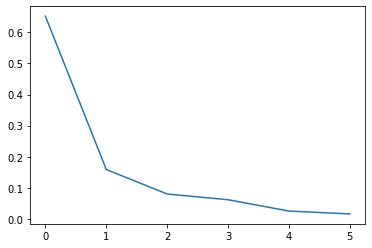

In [5]:
for i in range(len(normalized_df.columns)):
    pca = PCA(i)
    pca.fit(normalized_df.values)
    if sum(pca.explained_variance_ratio_) > 0.99:
        break

plt.plot(pca.explained_variance_ratio_)

In [6]:
tsne = TSNE(2, 5)

/Users/santiagocortes/opt/anaconda3/envs/cvef/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass perplexity=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [7]:
vectors_pca = pca.transform(normalized_df)
vectors_tsne = tsne.fit_transform(normalized_df)

Using tsne for dimensionality reduction before clustering **NOT RECOMENDED**

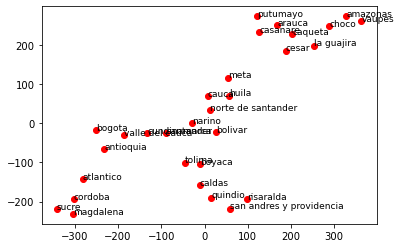

In [8]:
#pd.DataFrame(vectors_tsne, index=data_embeddings.index).plot.scatter(0, 1)
for index, departamento in enumerate(normalized_df.index):
    x, y = vectors_tsne[index]
    plt.scatter(x, y, color='red')
    plt.text(x+.05, y+.05, departamento, fontsize=9)
plt.show()


## Clustering

In [9]:
def choose_cluster_fit(vectors):
    cum_inertia_kmeans = []
    cum_inertia_kmedoids = []
    for i in range(1,len(vectors) + 1):
        kmeans = KMeans(i,random_state=42)
        kmeans.fit(vectors)
        cum_inertia_kmeans.append(kmeans.inertia_)
    for i in range(1,len(vectors)):
        kmedoids = KMedoids(i,random_state=42)
        kmedoids.fit(vectors)
        cum_inertia_kmedoids.append(kmedoids.inertia_)
    return cum_inertia_kmeans, cum_inertia_kmedoids 

In [10]:
cum_inertia_kmeans, cum_inertia_kmedoids = choose_cluster_fit(vectors_pca)

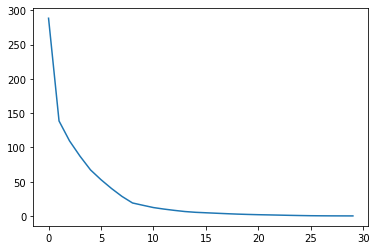

In [11]:
print(plt.plot(cum_inertia_kmeans))

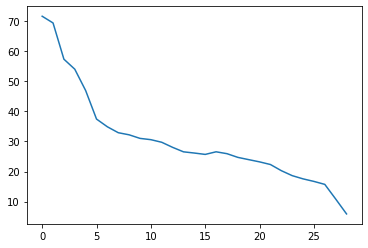

In [12]:
print(plt.plot(cum_inertia_kmedoids))

In [13]:
kmeans = KMeans(5,random_state=42)
kmedioids = KMedoids(8,random_state=42)
kmeans.fit(vectors_pca)
kmedioids.fit(vectors_pca)
clusters_kmeans = kmeans.predict(vectors_pca)
clusters_kmedioids = kmedioids.predict(vectors_pca)

In [14]:
aglomerating = AgglomerativeClustering(2)

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

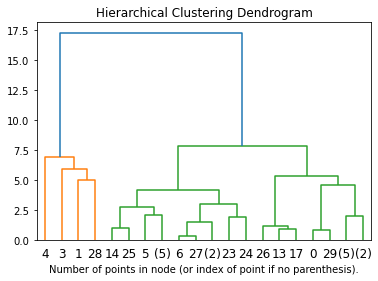

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(vectors_pca)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [17]:
aglomerative = AgglomerativeClustering(4).fit(vectors_pca)

In [18]:
political_map = gpd.read_file("map/MGN_DPTO_POLITICO.shp")
political_map.set_index(political_map.DPTO_CNMBR ,inplace=True)
political_map = political_map.sort_index()
political_map.set_index(indexes ,inplace=True)

In [19]:
political_map['cluster'] = 9
political_map['cluster'].loc[aux_index] = clusters_kmeans
political_map['cluster'] += 9

/Users/santiagocortes/opt/anaconda3/envs/cvef/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

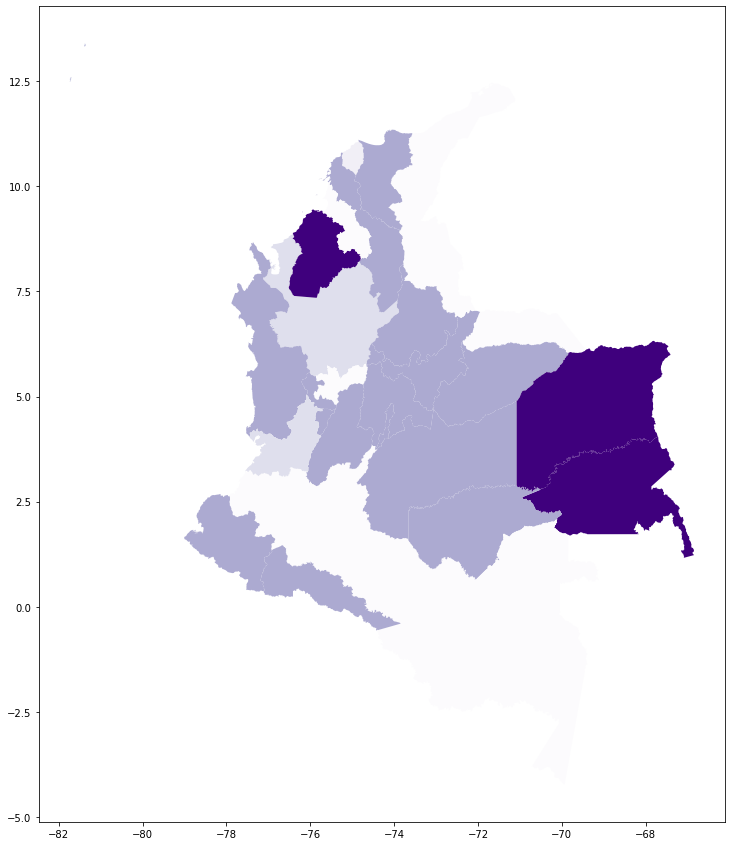

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
political_map.plot(column="cluster", ax=ax, cmap="Purples")

## Cluster and then tsne-2 for visualization

In [20]:
cum_inertia_kmeans, cum_inertia_kmedoids = choose_cluster_fit(normalized_df)

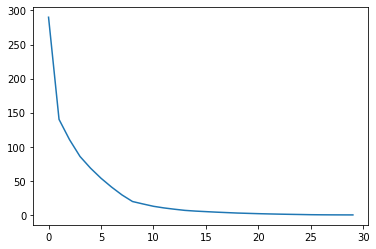

In [21]:
print(plt.plot(cum_inertia_kmeans))

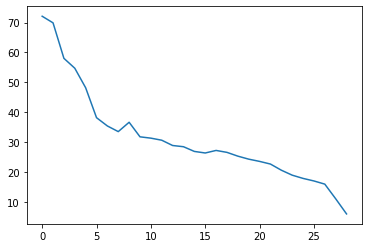

In [22]:
print(plt.plot(cum_inertia_kmedoids))

In [23]:
kmeans = KMeans(7,random_state=42)
kmedioids = KMedoids(5,random_state=42)
kmeans.fit(normalized_df)
kmedioids.fit(normalized_df)
clusters_kmeans = kmeans.predict(normalized_df)
clusters_kmedioids = kmedioids.predict(normalized_df)

In [24]:
tsne = TSNE(2, 5)
tsne_vectors = tsne.fit_transform(normalized_df)

/Users/santiagocortes/opt/anaconda3/envs/cvef/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass perplexity=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [37]:
colors = list(iter(cm.rainbow(np.linspace(0, 1, len(np.unique(clusters_kmeans))))))

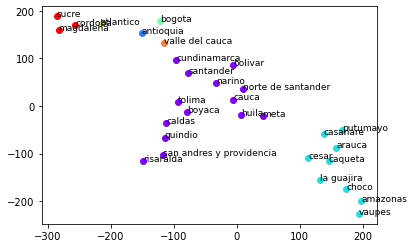

In [39]:

for index, departamento in enumerate(normalized_df.index):
    x, y = vectors_tsne[index]
    plt.scatter(x, y, color=colors[clusters_kmeans[index]])
    plt.text(x+.05, y+.05, departamento, fontsize=9)
plt.show()



# Autoencoder